In [326]:

file_path = 'test_input.txt'
file_path = 'input.txt'
with open(file_path) as file:
    lines =  [line.rstrip().split(' ') for line in file]

data = [[a[0].strip('.'), int(a[3]) * (1 if a[2] == 'gain' else -1)  , a[10].strip('.')] for a in lines]

data

[['Alice', -2, 'Bob'],
 ['Alice', -62, 'Carol'],
 ['Alice', 65, 'David'],
 ['Alice', 21, 'Eric'],
 ['Alice', -81, 'Frank'],
 ['Alice', -4, 'George'],
 ['Alice', -80, 'Mallory'],
 ['Bob', 93, 'Alice'],
 ['Bob', 19, 'Carol'],
 ['Bob', 5, 'David'],
 ['Bob', 49, 'Eric'],
 ['Bob', 68, 'Frank'],
 ['Bob', 23, 'George'],
 ['Bob', 29, 'Mallory'],
 ['Carol', -54, 'Alice'],
 ['Carol', -70, 'Bob'],
 ['Carol', -37, 'David'],
 ['Carol', -46, 'Eric'],
 ['Carol', 33, 'Frank'],
 ['Carol', -35, 'George'],
 ['Carol', 10, 'Mallory'],
 ['David', 43, 'Alice'],
 ['David', -96, 'Bob'],
 ['David', -53, 'Carol'],
 ['David', -30, 'Eric'],
 ['David', -12, 'Frank'],
 ['David', 75, 'George'],
 ['David', -20, 'Mallory'],
 ['Eric', 8, 'Alice'],
 ['Eric', -89, 'Bob'],
 ['Eric', -69, 'Carol'],
 ['Eric', -34, 'David'],
 ['Eric', 95, 'Frank'],
 ['Eric', 34, 'George'],
 ['Eric', -99, 'Mallory'],
 ['Frank', -97, 'Alice'],
 ['Frank', 6, 'Bob'],
 ['Frank', -9, 'Carol'],
 ['Frank', 56, 'David'],
 ['Frank', -17, 'Eric'],
 ['Fr

In [ ]:
nodes = list(np.unique([a[0] for a in data]))

matrix = np.zeros((len(nodes), len(nodes)))

for (a,w,b) in data:
    # print(a,w,b)
    matrix[nodes.index(a)][nodes.index(b)] = w

for i in range(len(matrix)):
     matrix[i][i] = np.nan

# Every row & col must have exactly 2 values
# maximize sum of each row and col
def get_col(c, matrix):
        return [m[c] for m in matrix]


def pairs(k, matrix):
    return([(i, sum(a)) for i, a in  enumerate(zip(matrix[k], get_col(k, matrix))) ])


def dropna(arr):
     arr = np.array(arr)
     return arr[~np.isnan(arr)]




def find_minimum(matrix):
    """
    This finds the worst pair in the matrix
    """
    big_int = 999999999999
    worst_el = None
    worst = big_int
    buf = []

    # print('---- building pp ----')
    for row, p in enumerate(nodes):
            
            # cannot have rows with less than 2 values
            # print('len test = ', row, len(dropna(matrix[row])), len(dropna(get_col(row,matrix))))
            
            # pp contains all values in this row..
            pp = pairs(row, matrix)
            
            for col,(_, val) in enumerate(pp):
                if not np.isnan(val):
                    if (len(dropna(matrix[row]))>2) and (len(dropna(get_col(col, matrix)))>2):
                        # print('Selected: ', row, col, val)
                        buf.append([(row, col), val])


    # print('---- end of pp ------\n')
    # buf contains a sorted list of all
    # pairs in the matrix, along with their coordinates
    
    buf = sorted(buf, key=lambda a:a[1]) 
    print(buf)

    (row, col), val = buf[0]
    return row, col



            
    # print(worst, worst_el)
    return None


iterations = [matrix.copy()]

for j in range(30):
    # print(f'\n\n==== ITERATION {j} ====')

    row, col = find_minimum(matrix)
    # print(f'Taking out ({row}, {col})', matrix[row][col], f'and ({col}, {row})', matrix[col][row])
    matrix[row][col] = np.nan
    matrix[col][row] = np.nan

    # display(matrix)
    iterations.append(matrix.copy())
    # print(sum([sum(dropna(k)) for k in matrix]))

    rows_len = np.array([len(dropna(m)) for m in matrix ])

    if all(rows_len==2):
        print('this is the end!')
        print(sum([sum(dropna(k)) for k in matrix]))
        display(matrix)
        break;


    

# 770 too high
# 643 wrong


[[(0, 5), -178.0], [(5, 0), -178.0], [(4, 7), -165.0], [(7, 4), -165.0], [(5, 7), -131.0], [(7, 5), -131.0], [(0, 2), -116.0], [(2, 0), -116.0], [(2, 4), -115.0], [(4, 2), -115.0], [(6, 7), -92.0], [(7, 6), -92.0], [(1, 3), -91.0], [(3, 1), -91.0], [(2, 3), -90.0], [(3, 2), -90.0], [(3, 4), -64.0], [(4, 3), -64.0], [(1, 2), -51.0], [(2, 1), -51.0], [(0, 7), -49.0], [(7, 0), -49.0], [(1, 4), -40.0], [(4, 1), -40.0], [(1, 7), -3.0], [(7, 1), -3.0], [(2, 5), 24.0], [(5, 2), 24.0], [(2, 6), 28.0], [(6, 2), 28.0], [(0, 4), 29.0], [(4, 0), 29.0], [(0, 6), 41.0], [(6, 0), 41.0], [(3, 5), 44.0], [(5, 3), 44.0], [(5, 6), 48.0], [(6, 5), 48.0], [(3, 7), 71.0], [(7, 3), 71.0], [(1, 5), 74.0], [(5, 1), 74.0], [(4, 5), 78.0], [(5, 4), 78.0], [(4, 6), 88.0], [(6, 4), 88.0], [(0, 1), 91.0], [(1, 0), 91.0], [(1, 6), 99.0], [(6, 1), 99.0], [(2, 7), 105.0], [(7, 2), 105.0], [(0, 3), 108.0], [(3, 0), 108.0], [(3, 6), 129.0], [(6, 3), 129.0]]
[[(4, 7), -165.0], [(7, 4), -165.0], [(5, 7), -131.0], [(7, 5),

array([[ nan,  -2.,  nan,  65.,  nan,  nan,  nan,  nan],
       [ 93.,  nan,  nan,  nan,  nan,  68.,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan, -35.,  10.],
       [ 43.,  nan,  nan,  nan,  nan,  nan,  nan, -20.],
       [ nan,  nan,  nan,  nan,  nan,  95.,  34.,  nan],
       [ nan,   6.,  nan,  nan, -17.,  nan,  nan,  nan],
       [ nan,  nan,  63.,  nan,  54.,  nan,  nan,  nan],
       [ nan,  nan,  95.,  91.,  nan,  nan,  nan,  nan]])

array([[ nan,  -2., -62.,  65.,  21., -81.,  -4., -80.],
       [ 93.,  nan,  19.,   5.,  49.,  68.,  23.,  29.],
       [-54., -70.,  nan, -37., -46.,  33., -35.,  10.],
       [ 43., -96., -53.,  nan, -30., -12.,  75., -20.],
       [  8., -89., -69., -34.,  nan,  95.,  34., -99.],
       [-97.,   6.,  -9.,  56., -17.,  nan,  18., -56.],
       [ 45.,  76.,  63.,  54.,  54.,  30.,  nan,   7.],
       [ 31., -32.,  95.,  91., -66., -75., -99.,  nan]])

-128.0


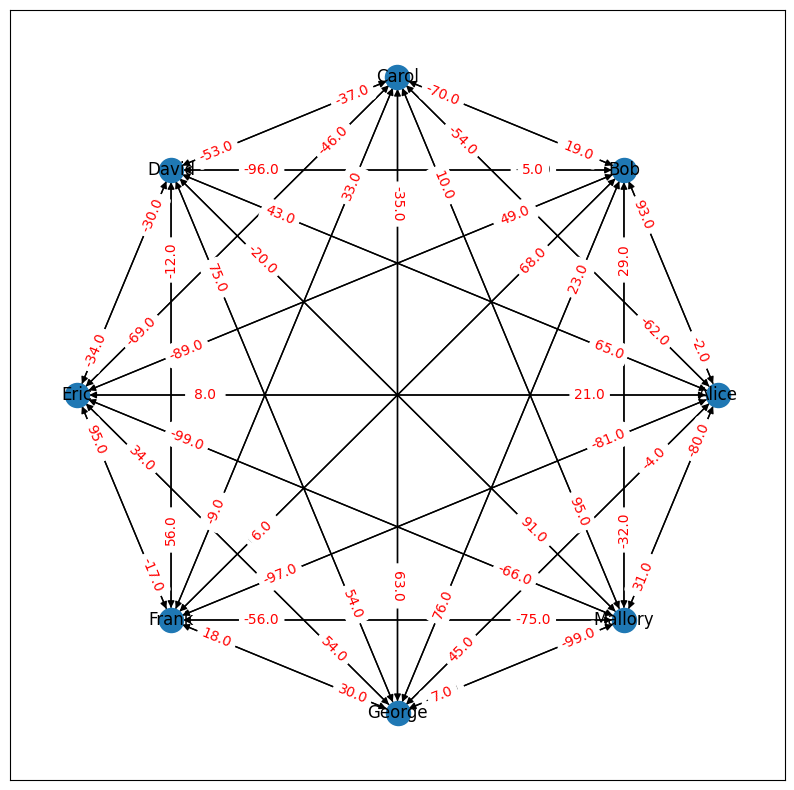

In [301]:

m = iterations[0]
display(m)
print(sum([sum(dropna(k)) for k in m]))
G = nx.MultiDiGraph()

for i, row in enumerate(m):
    for j, val in enumerate(row):
        if not np.isnan(val):
            G.add_edge(i,j, weight=val)
            # print('add edge', i,j,val)


fig, ax = plt.subplots(1,1, figsize=(10,10))
pos = nx.circular_layout(G)
# pos = nx.spring_layout(G)



nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax, labels=dict([(i, nodes[i]) for i in range(len(nodes))]))
nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=dict([((edge[0], edge[1]), edge[2]['weight']) for edge in G.edges(data=True)]), label_pos=0.2)
nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=dict([((edge[1], edge[0]), edge[2]['weight']) for edge in G.edges(data=True)]), label_pos=0.2, font_color='red')

G.edges(data=True)

plt.show()


In [274]:
dict([((edge[0], edge[1]), edge[2]['weight']) for edge in G.edges(data=True)])

{(0, 1): 83.0, (0, 3): 46.0, (1, 2): 60.0, (3, 2): 41.0}

In [275]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 83.0}), (0, 3, {'weight': 46.0}), (1, 2, {'weight': 60.0}), (3, 2, {'weight': 41.0})])

In [302]:
nodes

['Alice', 'Bob', 'Carol', 'David', 'Eric', 'Frank', 'George', 'Mallory']

In [309]:
print(" ".join(nodes))

Alice Bob Carol David Eric Frank George Mallory


In [310]:
len(nodes)

8

In [320]:
def print_matrix(matrix, nodes):
    print('\t', end='')
    for node in nodes:
        print(node, end='\t')
    print('')
    for i, row in enumerate(matrix):
        print(nodes[i], end='\t')
        for val in row:
            
            print(val, end='\t')
        print('')

print_matrix(iterations[0], nodes)

	Alice	Bob	Carol	David	Eric	Frank	George	Mallory	
Alice	nan	-2.0	-62.0	65.0	21.0	-81.0	-4.0	-80.0	
Bob	93.0	nan	19.0	5.0	49.0	68.0	23.0	29.0	
Carol	-54.0	-70.0	nan	-37.0	-46.0	33.0	-35.0	10.0	
David	43.0	-96.0	-53.0	nan	-30.0	-12.0	75.0	-20.0	
Eric	8.0	-89.0	-69.0	-34.0	nan	95.0	34.0	-99.0	
Frank	-97.0	6.0	-9.0	56.0	-17.0	nan	18.0	-56.0	
George	45.0	76.0	63.0	54.0	54.0	30.0	nan	7.0	
Mallory	31.0	-32.0	95.0	91.0	-66.0	-75.0	-99.0	nan	


# Brute force

In [381]:
file_path = 'test_input.txt'
file_path = 'input.txt'

with open(file_path) as file:
    lines =  [line.rstrip().split(' ') for line in file]

data = [[a[0].strip('.'), int(a[3]) * (1 if a[2] == 'gain' else -1)  , a[10].strip('.')] for a in lines]


print(data)


nodes = list(np.unique([a[0] for a in data]))




[['Alice', -2, 'Bob'], ['Alice', -62, 'Carol'], ['Alice', 65, 'David'], ['Alice', 21, 'Eric'], ['Alice', -81, 'Frank'], ['Alice', -4, 'George'], ['Alice', -80, 'Mallory'], ['Bob', 93, 'Alice'], ['Bob', 19, 'Carol'], ['Bob', 5, 'David'], ['Bob', 49, 'Eric'], ['Bob', 68, 'Frank'], ['Bob', 23, 'George'], ['Bob', 29, 'Mallory'], ['Carol', -54, 'Alice'], ['Carol', -70, 'Bob'], ['Carol', -37, 'David'], ['Carol', -46, 'Eric'], ['Carol', 33, 'Frank'], ['Carol', -35, 'George'], ['Carol', 10, 'Mallory'], ['David', 43, 'Alice'], ['David', -96, 'Bob'], ['David', -53, 'Carol'], ['David', -30, 'Eric'], ['David', -12, 'Frank'], ['David', 75, 'George'], ['David', -20, 'Mallory'], ['Eric', 8, 'Alice'], ['Eric', -89, 'Bob'], ['Eric', -69, 'Carol'], ['Eric', -34, 'David'], ['Eric', 95, 'Frank'], ['Eric', 34, 'George'], ['Eric', -99, 'Mallory'], ['Frank', -97, 'Alice'], ['Frank', 6, 'Bob'], ['Frank', -9, 'Carol'], ['Frank', 56, 'David'], ['Frank', -17, 'Eric'], ['Frank', 18, 'George'], ['Frank', -56, 'Mal

In [382]:

matrix = np.zeros((len(nodes), len(nodes)))


for (a,w,b) in data:
    # print(a,w,b)
    matrix[nodes.index(a)][nodes.index(b)] = w

for i in range(len(matrix)):
     matrix[i][i] = np.nan

print(matrix)


[[ nan  -2. -62.  65.  21. -81.  -4. -80.]
 [ 93.  nan  19.   5.  49.  68.  23.  29.]
 [-54. -70.  nan -37. -46.  33. -35.  10.]
 [ 43. -96. -53.  nan -30. -12.  75. -20.]
 [  8. -89. -69. -34.  nan  95.  34. -99.]
 [-97.   6.  -9.  56. -17.  nan  18. -56.]
 [ 45.  76.  63.  54.  54.  30.  nan   7.]
 [ 31. -32.  95.  91. -66. -75. -99.  nan]]


# Part I

In [383]:
from itertools import permutations

     
boo = list(permutations(range(len(nodes)), len(nodes)))



def summatore(k, matrix):
    total = []
    for i, _ in enumerate(k[:-1]):
        total.append( matrix[k[i]][k[i+1]])
        total.append( matrix[k[i+1]][k[i]])

    return sum(total)
    # return total

result = []
for b in boo:
    cur = list(b) + [b[0]]
    # print(cur)
    s = summatore(cur, matrix)
    # print([nodes[i] for i in cur], s)
    result.append(s)
    # break

# result = sorted(result)

# print(result[-20:])
print(max(result))


# len(bo)
# print_matrix(m, nodes)

664.0


# Part II

In [384]:

     
boo = list(permutations(range(len(nodes)), len(nodes)))



def summatore(k, matrix):
    total = []
    for i, _ in enumerate(k[:-1]):
        total.append( matrix[k[i]][k[i+1]]+ matrix[k[i+1]][k[i]])
        # total.append( matrix[k[i+1]][k[i]])

    return sum(total) - min(total)
    # return total

result = []
for b in boo:
    cur = list(b) + [b[0]]
    # print(cur)
    s = summatore(cur, matrix)
    # print([nodes[i] for i in cur], s)
    result.append(s)
    # break

# result = sorted(result)

# print(result[-20:])
print(max(result))


640.0
